
## 1. Data Understanding 

#### Import all required packages

In [1]:
import numpy as np
import pandas as pd

# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# To build the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Changing default display options for better visibility of data

pd.options.display.max_colwidth = 225
pd.options.display.max_rows=225

In [3]:
# Import and read the data for analysis

data_housing =pd.read_csv(r"C:\Users\sandeep\Documents\train.csv")
data_housing.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
#data_housing.info()

print(data_housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data_housing.select_dtypes('object').nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

### Count the number of nan values in each column

In [7]:
data_housing.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

In [8]:
data_housing.select_dtypes(include='object').isnull().sum()>0
data_housing.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
# Checking  NAN values columnwise

missing_values = (data_housing.isnull().sum()).sort_values(ascending=False)
missing_values

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

### Replace '0' values with 'nan'

In [10]:
from numpy import nan
data_housing.replace(0, nan)
data_housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [11]:
# List of columns with missing values

missing_cols = missing_values[missing_values>0]
print(missing_cols)
print("Total number of columns with missing values are :", missing_cols.count())


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
Total number of columns with missing values are : 19


## 2. Cleaning Dataset

In [12]:
# Dropping Columns with more than 15 % missing values
data_housing.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis=1, inplace=True)


In [13]:
print("Shape of Dataset :  ",data_housing.shape,"\n\n")
print(((data_housing.isnull().sum()/data_housing.shape[0])*100).round(2))

Shape of Dataset :   (1460, 75) 


Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.

In [14]:
# Dropping rows for the NaN values 

data_housing.dropna(axis='rows', inplace=True)

In [15]:
# Checking for percentage of missing values per column

print(data_housing.shape)

(1338, 75)


In [16]:
# Check the numeric variables

data_housing._get_numeric_data().columns

#data_housing._get_categoric_data().columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
# Dropping duplicate values in dataset, if exist

data_housing = data_housing.drop_duplicates()
print(f'\nShape of dataframe:\n{data_housing.shape}')
data_housing.head()


Shape of dataframe:
(1338, 75)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
# Removing identifier field as it does not play any role in predicting house prices
data_housing.drop(['Id'], axis=1, inplace=True)

In [19]:
# let's again check for NAN values columnwise

print("Number of missing values are :",data_housing.isnull().sum().sum(),"\n")
print(data_housing.isnull().sum().sort_values(ascending=False))


Number of missing values are : 0 

SalePrice        0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofMatl         0
YearRemodAdd     0
SaleCondition    0
YearBuilt        0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea       

# 3. Exploratory Data Analysis

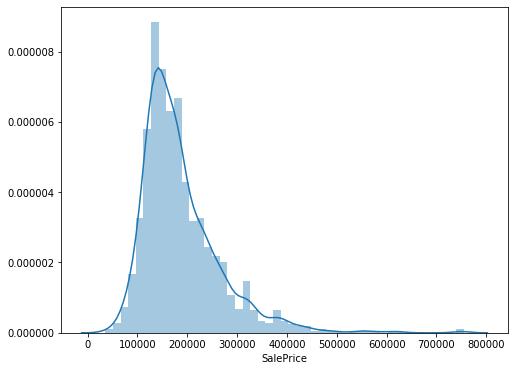

In [20]:
plt.figure(figsize = (8,6))
sns.distplot(data_housing['SalePrice'])

#### Observations:
1- Majority of the houses are between 50000 and 250000 price range.  
2- Some houses have very high price range - as high as 800000.

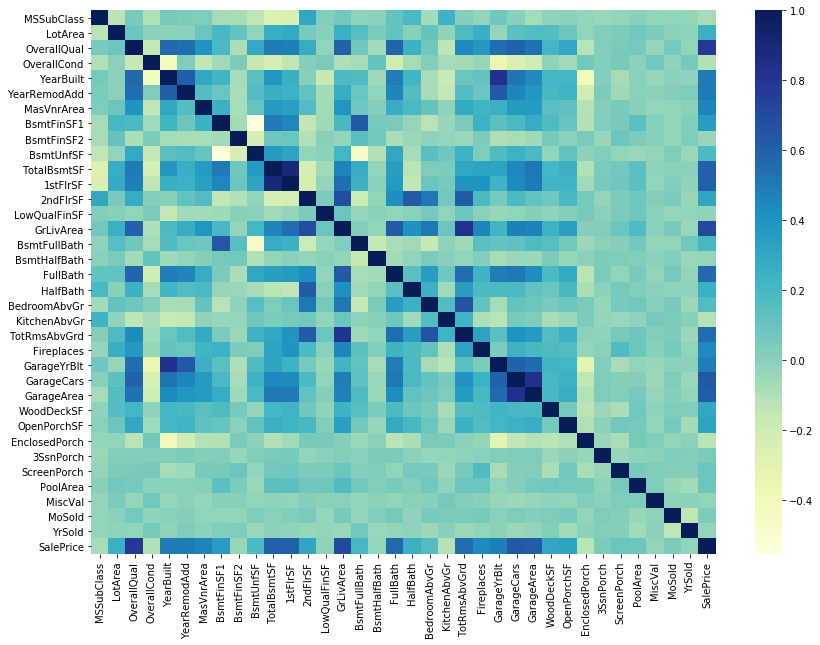

In [21]:
corval=data_housing.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corval,cmap='YlGnBu')

### Summary :
1. There plots above shows there exist some linear relationship between various columns and output column.
2. The heatmap is condensed however we do have collinearity in data

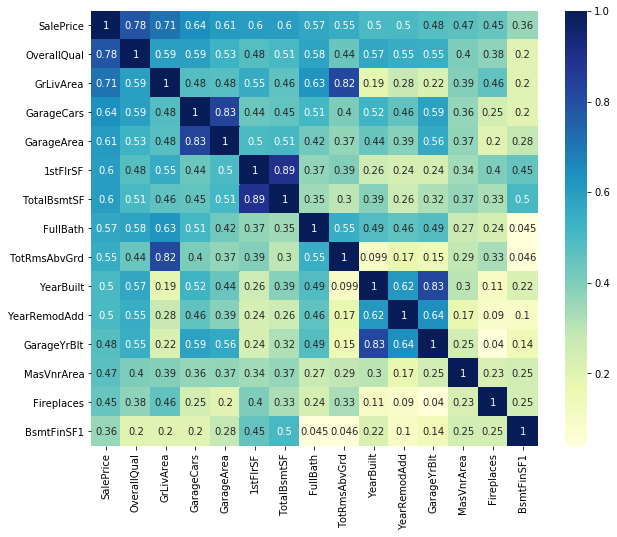

In [22]:
#top 15 variables correlated to sales-price

corval=data_housing.corr()
col=corval.nlargest(15,'SalePrice').index
plt.figure(figsize=(10,8))
sns.heatmap(data_housing[col].corr(),annot=True,cmap='YlGnBu')

Looking at the above heatmap plot, correlation values w.r.t SalePrice is highest for OverallQual.

In [23]:
corval.nlargest(15,'SalePrice').index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

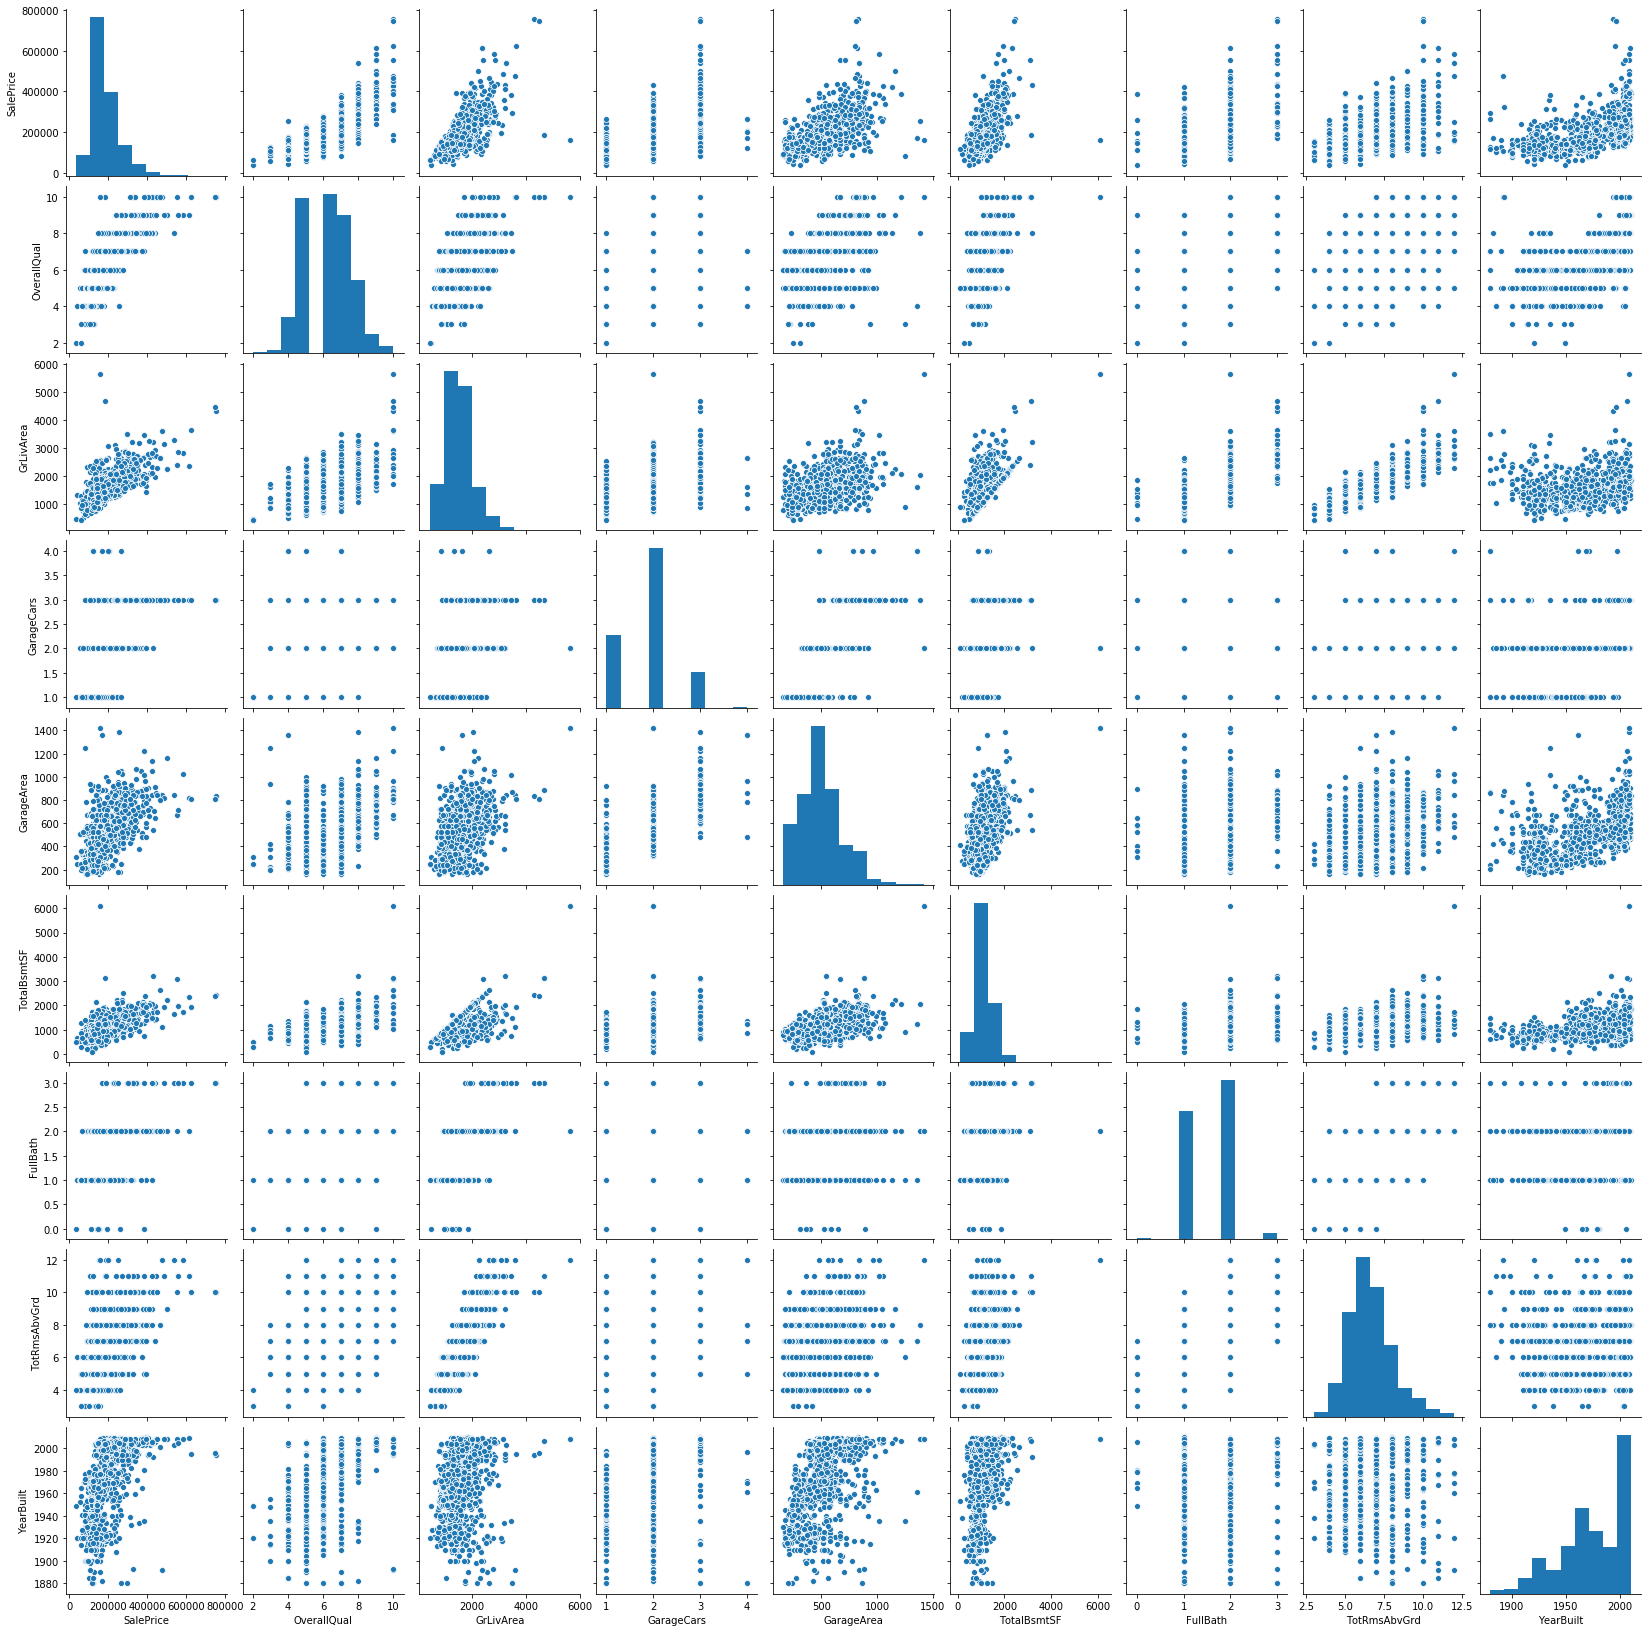

In [24]:
col=['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',  'FullBath', 'TotRmsAbvGrd', 
     'YearBuilt']
sns.pairplot(data_housing[col])

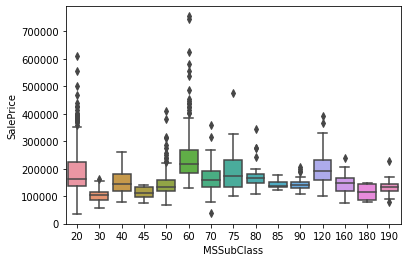

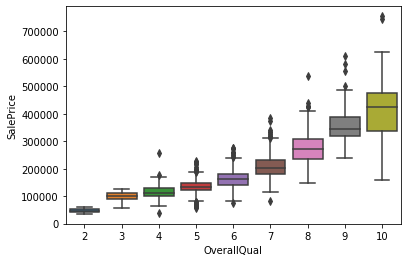

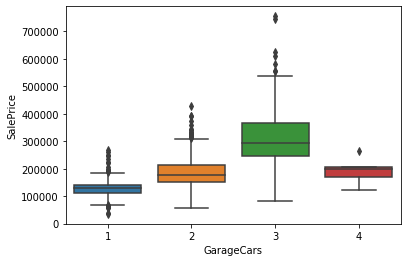

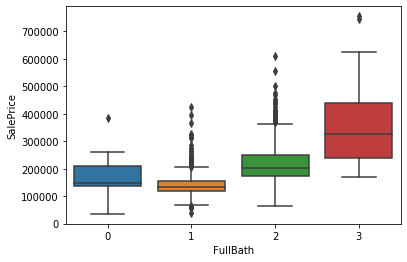

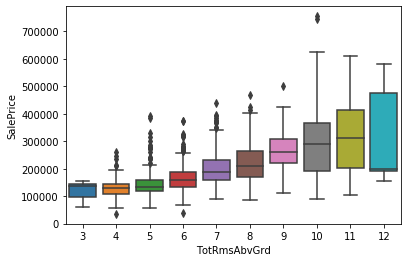

In [25]:
col = ['MSSubClass','OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd']
for i in col:
    sns.boxplot(data=data_housing, x=i,y='SalePrice')
    plt.show()

# 4- Data Preparation

In [26]:
numerical_data=data_housing.select_dtypes(['float64','int64'])
categorical_data=data_housing.select_dtypes(['object'])
print(numerical_data.shape)
print(categorical_data.shape)

(1338, 36)
(1338, 38)


In [27]:
numerical_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [28]:
#Create dummy variables

dummy_data=pd.get_dummies(categorical_data,drop_first=True)

In [29]:
master_data=pd.concat([numerical_data,dummy_data],axis=1)

### Preparing Test and Train Set

In [30]:

X=master_data.drop(['SalePrice'],axis=1)
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [31]:
y=master_data['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [32]:
#standardize the values through the dataframe

scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X, y, train_size=0.7,test_size=0.3, random_state=100)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((936, 226), (402, 226), (936,), (402,))

## 5-  Model Building and Evaluation

#### Performing Simple Linear Regression

In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9315510989941922
0.6583786217420098


In [36]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-512981.029, 'constant'),
 (-218487.764, 'Condition2_PosN'),
 (-106576.134, 'GarageQual_Fa'),
 (103256.712, 'GarageCond_Gd'),
 (102049.616, 'GarageCond_Fa'),
 (101499.929, 'GarageCond_TA'),
 (-99431.971, 'GarageQual_TA'),
 (-90913.622, 'GarageQual_Gd'),
 (-76342.749, 'Exterior1st_ImStucc'),
 (66618.565, 'Exterior1st_CemntBd'),
 (-66287.411, 'Exterior2nd_CmentBd'),
 (-66266.297, 'Functional_Sev'),
 (61302.09, 'RoofMatl_Membran'),
 (-55277.366, 'Exterior1st_Stone'),
 (47027.934, 'GarageCond_Po'),
 (46703.183, 'Exterior2nd_ImStucc'),
 (43273.016, 'Exterior2nd_AsphShn'),
 (42527.408, 'MSZoning_FV'),
 (-41721.304, 'Utilities_NoSeWa'),
 (-39882.411, 'Exterior1st_Plywood'),
 (-39008.388, 'GarageQual_Po'),
 (37812.029, 'Exterior2nd_Brk Cmn'),
 (36391.237, 'MSZoning_RL'),
 (36082.398, 'Street_Pave'),
 (-34475.71, 'Exterior1st_HdBoard'),
 (34434.882, 'MSZoning_RH'),
 (-31563.951, 'LandSlope_Sev'),
 (-31247.828, 'Condition1_RRAe'),
 (31205.004, 'MSZoning_RM'),
 (-30619.588, 'RoofMatl_CompShg'),

### Ridge Regression

In [37]:
# list of Alpha values for model-tuning

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge,param_grid = params,
                        scoring= 'r2',cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [38]:
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010550,0.002257,0.003123,0.002681,0.0001,{'alpha': 0.0001},0.854674,0.890353,0.723891,0.897272,...,0.808549,0.090863,27,0.936056,0.931447,0.948321,0.926187,0.956558,0.939714,0.011158
1,0.010770,0.001724,0.002030,0.002209,0.001,{'alpha': 0.001},0.855062,0.890800,0.723868,0.897444,...,0.809020,0.090624,26,0.936056,0.931446,0.948321,0.926187,0.956557,0.939713,0.011158
2,0.010852,0.004770,0.003286,0.002489,0.01,{'alpha': 0.01},0.858113,0.893968,0.723663,0.899230,...,0.812736,0.088833,24,0.936039,0.931404,0.948298,0.926160,0.956502,0.939681,0.011152
3,0.006488,0.003570,0.003213,0.003935,0.05,{'alpha': 0.05},0.864017,0.897691,0.723066,0.906763,...,0.821028,0.085103,23,0.935864,0.931026,0.948095,0.925886,0.955969,0.939368,0.011094
4,0.007516,0.003660,0.000991,0.001252,0.1,{'alpha': 0.1},0.866762,0.898087,0.722583,0.913769,...,0.826638,0.082574,22,0.935626,0.930608,0.947838,0.925504,0.955213,0.938958,0.010999


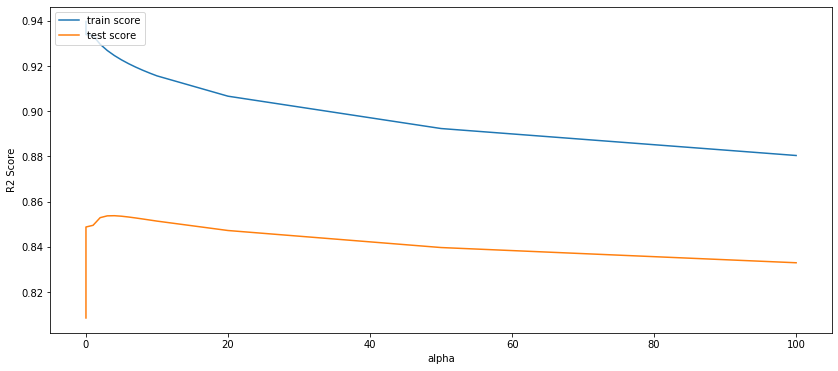

In [39]:
# plotting mean test and train scoes with alpha  
plt.figure(figsize=(14,6))

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [40]:
ridge_cv.best_score_

0.8537878763331161

In [41]:
ridge_cv.best_params_

{'alpha': 4.0}

**Optimal value of lambda for ridge is 4.**

In [75]:
alpha = 4

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [76]:
#predicting
y_train_pred=ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred=ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.9144129221594666
0.70191021048429


In [78]:
coef = pd.Series(ridge.coef_, index = X_train.columns)
var_selected = sum(coef != 0)
print('Ridge has selected {} variables'.format(var_selected))

Ridge has selected 218 variables


### Lasso Regression

In [71]:
lasso=Lasso()

#cross-validation
folds=5
model_cv1=GridSearchCV(estimator=lasso, param_grid=params, 
                      scoring='neg_mean_absolute_error', cv=folds,verbose=1,
                     return_train_score=True)
model_cv1.fit(X_train,y_train)

model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   38.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   36.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [45]:
cv_results = pd.DataFrame(model_cv1.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.116081,0.009432,0.000403,0.000807,0.0001,{'alpha': 0.0001},-21413.342923,-18226.034915,-19982.134316,-16627.388431,...,-19883.946577,2302.440176,28,-12693.534050,-12937.089975,-12214.787484,-13872.802126,-11406.565958,-12624.955919,813.875055
1,0.113876,0.009622,0.001601,0.003203,0.001,{'alpha': 0.001},-21412.253785,-18222.260730,-19986.661782,-16613.177611,...,-19880.952811,2306.781343,27,-12693.547358,-12937.074364,-12214.792606,-13872.785624,-11406.574742,-12624.954939,813.865876
2,0.137529,0.019613,0.001672,0.001803,0.01,{'alpha': 0.01},-21401.424882,-18184.639131,-20010.981380,-16559.773686,...,-19864.601710,2324.990183,25,-12693.688079,-12936.934158,-12214.949145,-13872.653290,-11406.711931,-12624.987320,813.760066
3,0.123613,0.017625,0.000921,0.000975,0.05,{'alpha': 0.05},-21357.830083,-18017.720503,-20054.743198,-16571.520204,...,-19829.799165,2336.258418,24,-12694.311920,-12936.477471,-12215.623879,-13872.085229,-11407.293811,-12625.158462,813.319245
4,0.093512,0.015961,0.003447,0.006117,0.1,{'alpha': 0.1},-21305.043221,-17809.911711,-20077.938187,-16586.515201,...,-19780.581556,2352.577478,23,-12695.067568,-12936.321813,-12216.496644,-13871.846052,-11408.246833,-12625.595782,812.873582


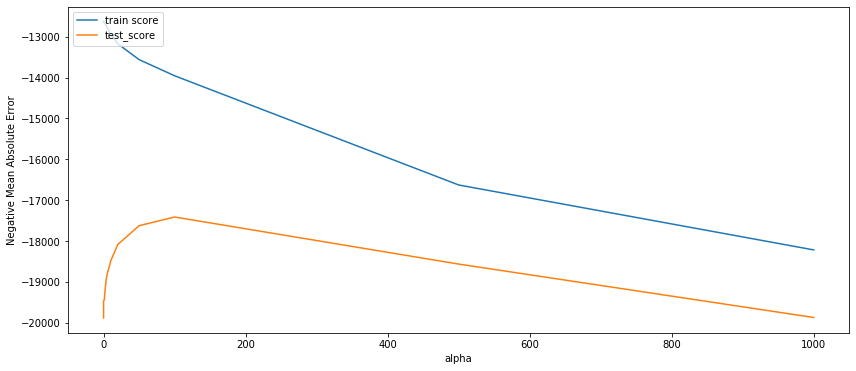

In [46]:
plt.figure(figsize=(14,6))
cv_results['param_alpha']=cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test_score'],loc='upper left')
plt.show()

In [47]:
model_cv1.best_score_

-17412.140016678786

In [48]:
model_cv1.best_params_

{'alpha': 100}

#### Optimal value of lambda for lasso is 100.

In [80]:
alpha=100
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
# Predict
y_train_pred1=lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred1))

y_test_pred1=lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred1))

0.9184876613970804
0.6978370459079015


In [82]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
var_selected = sum(coef != 0)
print('Lasso has selected {} variables'.format(var_selected))

Lasso has selected 98 variables


In [67]:
# Best variables predicting housing prices as per Lasso Regression

main_coef = pd.concat([coef.sort_values().head(10),
                       coef.sort_values().tail(10)])
main_coef.sort_values(ascending=False)

RoofMatl_WdShngl          29545.668283
Neighborhood_NridgHt      23972.009513
Neighborhood_NoRidge      23467.850348
Neighborhood_Crawfor      19169.867757
BsmtExposure_Gd           17426.910413
SaleCondition_Partial     16948.006422
OverallQual               10294.976534
Condition1_Norm           10023.468033
Neighborhood_StoneBr       8464.856447
Exterior1st_BrkFace        8297.613843
Neighborhood_NAmes        -5091.757149
BsmtQual_TA               -5877.311687
Neighborhood_NWAmes       -6060.055423
ExterQual_Gd              -9811.981787
ExterQual_TA             -11834.395321
KitchenQual_TA           -12668.412850
BsmtQual_Gd              -13383.506542
KitchenAbvGr             -13690.622464
KitchenQual_Gd           -15892.834715
Condition2_PosN         -127394.336722
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

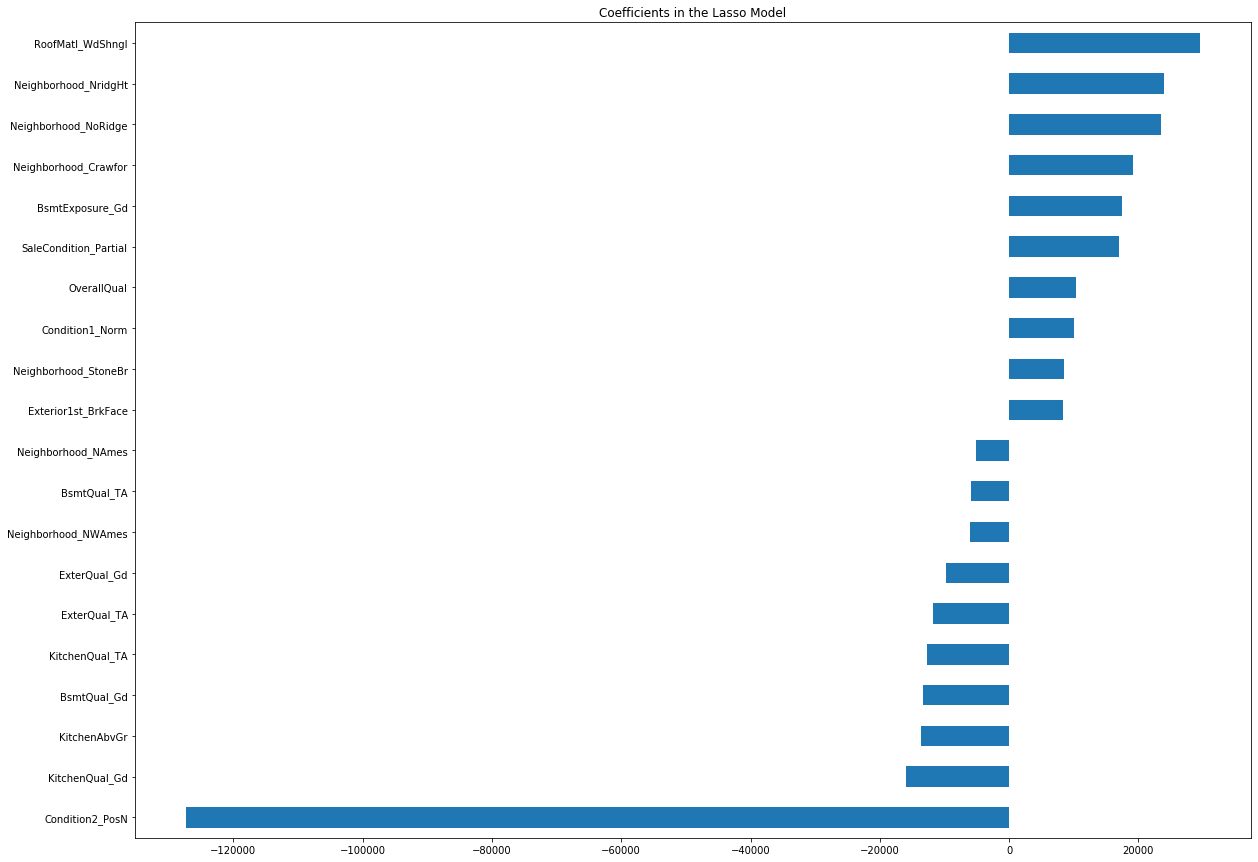

In [59]:
# Let's plot these variables
plt.figure(figsize = (20,15))

main_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

# 6-  Conclusion

#### 1. Following are the most significant variables in predicting the price of a house:

RoofMatl_WdShngl          
Neighborhood_NoRidge     
Neighborhood_NridgHt      
Neighborhood_Crawfor      
SaleCondition_Partial    
BsmtExposure_Gd           
Neighborhood_StoneBr     
LandContour_HLS           
LandContour_Lvl           
Exterior1st_BrkFace       
Neighborhood_NAmes       
Neighborhood_NWAmes      
KitchenQual_Fa         
BsmtQual_Gd              
KitchenAbvGr             
ExterQual_Gd             
ExterQual_TA             
KitchenQual_TA          
KitchenQual_Gd           
Condition2_PosN         

#### 2. Most important 30 features that are affecting Sales pricing are:

In [54]:
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')

Condition2_PosN                         Score: -218487.764
GarageQual_Fa                           Score: -106576.134
GarageCond_Gd                           Score: 103256.712
GarageCond_Fa                           Score: 102049.616
GarageCond_TA                           Score: 101499.929
GarageQual_TA                           Score: -99431.971
GarageQual_Gd                           Score: -90913.622
Exterior1st_ImStucc                     Score: -76342.749
Exterior1st_CemntBd                     Score: 66618.565
Exterior2nd_CmentBd                     Score: -66287.411
Functional_Sev                          Score: -66266.297
RoofMatl_Membran                        Score: 61302.09
Exterior1st_Stone                       Score: -55277.366
GarageCond_Po                           Score: 47027.934
Exterior2nd_ImStucc                     Score: 46703.183
Exterior2nd_AsphShn                     Score: 43273.016
MSZoning_FV                             Score: 42527.408
Utilities_NoSeWa   

#### 3. The optimal value of lambda for ridge and lasso regression.
(i) The optimal value of lambda for ridge is 4.

(ii)The optimal value of lambda for lasso is 100.